# Q1. Implement Principal Component Analysis Algorithm and use it to reduce dimension of iris dataset.
## Consider the following instructions:
* Plot the magnitude of eigen values in sorted order.
* Plot the reconstructed data points along with the class labels using 1 and 2 PCs for reconstruction.
* Classify the dimension reduced dataset using Bayes Classifier.

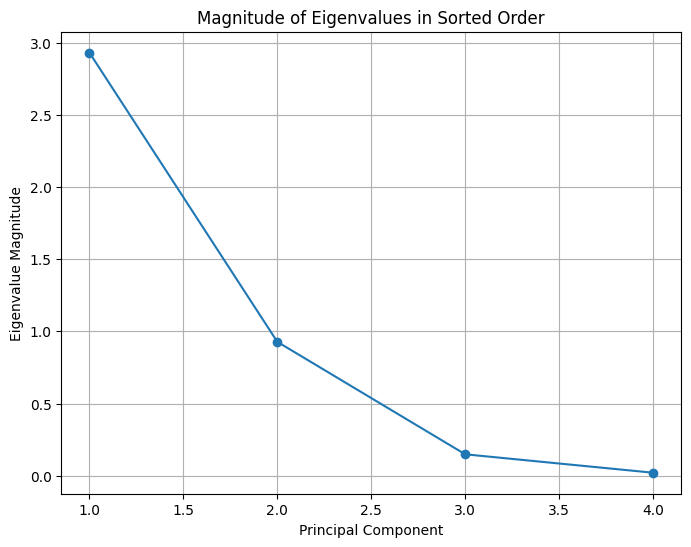

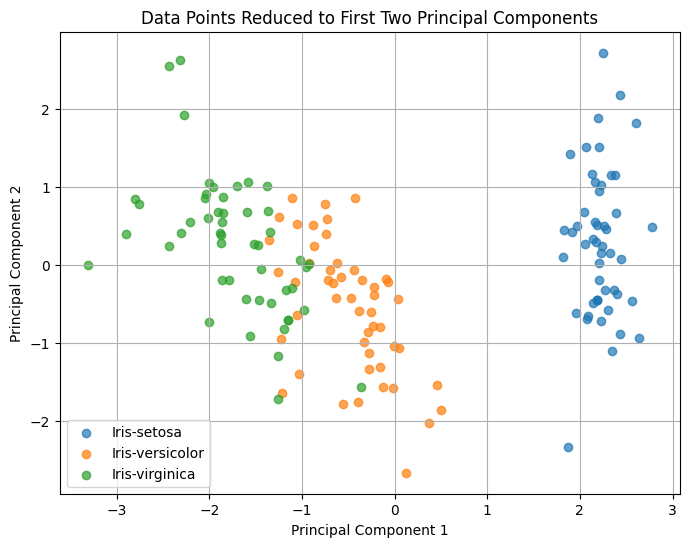

Accuracy of Gaussian Naive Bayes Classifier on PCA-reduced data: 0.97


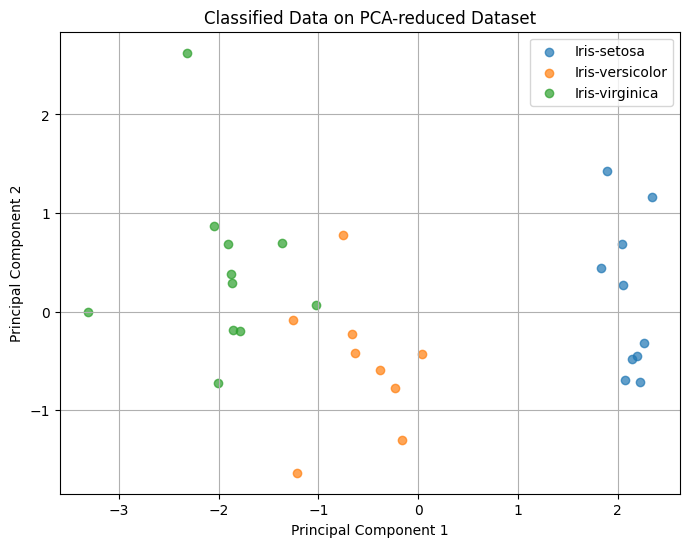

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Load the Iris dataset
file_path = 'Iris.csv'
data = pd.read_csv(file_path)

# Drop the 'Id' column and separate features and labels
data = data.drop(columns=['Id'])
X = data.drop(columns='Species').values
y = data['Species'].values

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Implement PCA manually
# Step 1: Calculate the covariance matrix
cov_matrix = np.cov(X_standardized, rowvar=False)

# Step 2: Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Step 3: Sort eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 4: Project the data onto the first two principal components
X_pca = X_standardized @ eigenvectors[:, :2]

# Plot the magnitude of eigenvalues in sorted order
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.title('Magnitude of Eigenvalues in Sorted Order')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue Magnitude')
plt.grid()
plt.show()

# Plot the reconstructed data using the first and second principal components
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=label, alpha=0.7)
plt.title('Data Points Reduced to First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

# Classify the dimension-reduced dataset using a Bayesian classifier
# Split the reduced data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize and train the Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict and evaluate the classifier on the test set
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Gaussian Naive Bayes Classifier on PCA-reduced data: {accuracy:.2f}")

# Plotting the classification results on PCA-reduced dataset
plt.figure(figsize=(8, 6))
for label in np.unique(y_test):
    plt.scatter(X_test[y_test == label, 0], X_test[y_test == label, 1], label=label, alpha=0.7)
plt.title('Classified Data on PCA-reduced Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()